<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/pivot-point-driven-pendulum-henry8675309/blob/main/Stability2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Pivot-Driven Pendulum Workflow


## 1. Physics Derivation (EOM)

**Goal:** Derive the Equation of Motion (EOM) for $\ddot{\theta}$ using the Lagrangian method ($L = T - V$).

**Coordinates:**
* **Pivot:**
    $$x_p(t) = -l \sin(\omega_d t)$$
    $$y_p(t) = l (\cos(\omega_d t) - 1)$$

* **Bob:**
    $$x_b(t) = x_p(t) + l \sin(\theta)$$
    $$y_b(t) = y_p(t) - l \cos(\theta)$$

**Velocities:**
$$\dot{x}_b = \dot{x}_p + l \dot{\theta} \cos(\theta)$$
$$\dot{y}_b = \dot{y}_p + l \dot{\theta} \sin(\theta)$$

**Lagrangian:**
$$T = \frac{1}{2}m(\dot{x}_b^2 + \dot{y}_b^2)$$
$$V = mgy_b$$

**Solve:**
$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}}\right) - \frac{\partial L}{\partial \theta} = 0 \implies \ddot{\theta} = f(t, \theta, \dot{\theta}, \omega_d)$$

## 2. Code Implementation

  * Import `numpy`, `matplotlib.pyplot`, `solve_ivp`, `FuncAnimation`, and `HTML`.

  * Define `pendulum_ode(t, y, ...)`: Implements the EOM for $\ddot{\theta}$ from Part 1.

  * Define `get_pivot_xy(t, ...)`: Implements the corrected pivot equations from the homework image.

  * Define `get_pendulum_xy(theta, l)`: Calculates bob's position relative to pivot.

  * Define `get_lab_xy(...)`: Calculates bob's position in the lab frame.

  * Copy `create_pendulum_animation(...)` from the `README.md` file.

## 3. Simulation & Visualization

  * **1. Set Parameters:** `l`, `g`, `omega_d`.

  * **2. Set Initial Conditions:** $\theta_0=0$ and $\dot{\theta}_0=0$.

  * **3. Set Time:** `t_plot = np.linspace(0, 30, 1000)`.

  * **4. Solve ODE:** `sol = solve_ivp(pendulum_ode, ...)`.

  * **5. Plot Angle vs. Time:** `plt.plot(sol.t, sol.y[0])`. This is our main stability check.

  * **6. Animate:** Use helper functions and `create_pendulum_animation` to create the video.

## 4. Stability Analysis

  * **1. Analytic (Text Cell):** Linearize the EOM from Part 1 for "nearly stationary" motion using small-angle approximations:
    $$\sin(\theta) \approx \theta$$
    $$\cos(\theta) \approx 1$$
    Analyze the resulting linear equation to predict at which frequencies $\omega_d$ parametric resonance (instability) occurs, relative to $\omega_0 = \sqrt{g/l}$.

  * **2. Computational (Code Cell):** Test the analytic predictions by running the simulation (Part 3) with different `omega_d` values (e.g., `0.5*omega_0`, `2.0*omega_0`).

## 5. Conclusion (Text Cell)

  * Write a final summary comparing the analytic predictions for instability with the results from the "Angle vs. Time" plots.




## 1. Physics Derivation: Equation of Motion (EOM)

Before we can simulate the system, we must derive the equation for the angular acceleration, $\ddot{\theta}$. We will use the Lagrangian method, $L = T - V$.

**1. Coordinates**
* **Pivot Position:**
    $$x_p(t) = -l \sin(\omega_d t)$$
    
    $$y_p(t) = l (\cos(\omega_d t) - 1)$$
* **Bob Position (Lab Frame):**
    $$x_b(t) = x_p(t) + l \sin(\theta) = -l \sin(\omega_d t) + l \sin(\theta)$$
    
    $$y_b(t) = y_p(t) - l \cos(\theta) = l (\cos(\omega_d t) - 1) - l \cos(\theta)$$

**2. Velocities**
* **Pivot Velocities:**
    $$\dot{x}_p = -l \omega_d \cos(\omega_d t)$$
    
    $$\dot{y}_p = -l \omega_d \sin(\omega_d t)$$
* **Bob Velocities:**
    $$\dot{x}_b = \dot{x}_p + l \dot{\theta} \cos(\theta) = -l \omega_d \cos(\omega_d t) + l \dot{\theta} \cos(\theta)$$
    
    $$\dot{y}_b = \dot{y}_p + l \dot{\theta} \sin(\theta) = -l \omega_d \sin(\omega_d t) + l \dot{\theta} \sin(\theta)$$

**3. Lagrangian ($L = T - V$)**

* **Kinetic Energy (T):** $T = \frac{1}{2} m (\dot{x}_b^2 + \dot{y}_b^2)$
    
    Expanding $\dot{x}_b^2 + \dot{y}_b^2$:
    
    $$(\dot{x}_p + l \dot{\theta} \cos\theta)^2 + (\dot{y}_p + l \dot{\theta} \sin\theta)^2$$
    
    $$= (\dot{x}_p^2 + \dot{y}_p^2) + l^2 \dot{\theta}^2(\cos^2\theta + \sin^2\theta) + 2l\dot{\theta}(\dot{x}_p \cos\theta + \dot{y}_p \sin\theta)$$
   
    The first term is $l^2 \omega_d^2$. The second is $l^2 \dot{\theta}^2$& The third term becomes:
    
    $$2l\dot{\theta}(-l\omega_d \cos(\omega_d t)\cos\theta - l\omega_d \sin(\omega_d t)\sin\theta)$$
    
    $$= -2l^2\omega_d\dot{\theta}\cos(\omega_d t - \theta)$$
    So, the full kinetic energy is:
    $$T = \frac{1}{2} m l^2 (\dot{\theta}^2 + \omega_d^2 - 2\omega_d\dot{\theta}\cos(\omega_d t - \theta))$$

* **Potential Energy (V):** $V = m g y_b$

    $$V = m g [l (\cos(\omega_d t) - 1) - l \cos(\theta)] = mgl (\cos(\omega_d t) - \cos(\theta) - 1)$$

**4. Euler-Lagrange Equation**
We must solve $\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}}\right) = \frac{\partial L}{\partial \theta}$.

* **LHS:**
    $$\frac{\partial L}{\partial \dot{\theta}} = m l^2 (\dot{\theta} - \omega_d \cos(\omega_d t - \theta))$$
    $$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}}\right) = m l^2 (\ddot{\theta} + \omega_d(\omega_d - \dot{\theta})\sin(\omega_d t - \theta))$$

* **RHS:**
    $$\frac{\partial L}{\partial \theta} = -m l^2 \omega_d\dot{\theta}\sin(\omega_d t - \theta) - mgl \sin(\theta)$$

**5. Final Equation of Motion**
Setting the LHS equal to the RHS:

$$m l^2 (\ddot{\theta} + \omega_d^2\sin(\omega_d t - \theta) - \omega_d\dot{\theta}\sin(\omega_d t - \theta)) = -m l^2 \omega_d\dot{\theta}\sin(\omega_d t - \theta) - mgl \sin(\theta)$$

The $m l^2 \omega_d \dot{\theta} \sin(...)$ terms cancel. Dividing by $m l^2$ gives:

$$\ddot{\theta} + \omega_d^2\sin(\omega_d t - \theta) = - \frac{g}{l} \sin(\theta)$$
Isolating $\ddot{\theta}$, we get our final EOM to implement in the code:
$$\ddot{\theta} = - \frac{g}{l} \sin(\theta) - \omega_d^2 \sin(\omega_d t - \theta)$$

In [9]:
# Import all required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define global constants
g = 9.81  # gravity (m/s^2)
l = 1.0   # pendulum length (m)
omega_d = 2.0  # Driving frequency (rad/s) - We will change this later!


In [20]:
# --- Define global parameters ---
g = 9.81  # acceleration due to gravity
l = 1.0   # pendulum length
omega_d = 2.0  # Driving frequency (you will change this to test stability)

# --- Define the Equation of Motion ---
def pendulum_ode(t, y, l, g, omega_d):
    """
    The EOM for the pivot-driven pendulum.
    """
    theta, dtheta = y # y[0] is theta, y[1] is dtheta

    # d2theta is the EOM you derived in Part 2.
    # It will be a function of t, theta, dtheta, l, g, and omega_d
    # Example (THIS IS NOT THE ANSWER, just a placeholder):
    # d2theta = -(g/l) * np.sin(theta) + np.cos(omega_d * t) * np.sin(theta)

    # Replace ... with your derived equation
    d2theta = -(g/l) * np.sin(theta) - omega_d**2 * np.sin(omega_d * t - theta)

    return [dtheta, d2theta]

# --- Define Coordinate Helper Functions ---
def get_pivot_xy(t, l, omega_d):
    """
    Calculates pivot coordinates based on the CORRECTED parameterization.
    """
    x_p = -l * np.sin(omega_d * t)
    y_p = l * (np.cos(omega_d * t) - 1)
    return x_p, y_p

def get_pendulum_xy(theta, l):
    """
    Calculates bob coordinates relative to the pivot.
    """
    x_pendulum = l * np.sin(theta)
    y_pendulum = -l * np.cos(theta)
    return x_pendulum, y_pendulum

def get_lab_xy(x_pivot, y_pivot, x_pendulum, y_pendulum):
    """
    Calculates bob coordinates in the lab frame.
    """
    x_lab = x_pivot + x_pendulum
    y_lab = y_pivot + y_pendulum
    return x_lab, y_lab

In [16]:
# create pendulum animation
import matplotlib.pyplot as plt # Import matplotlib.pyplot

def create_pendulum_animation(t, x_pivot, y_pivot, x_lab, y_lab, l=1, show_traj=False, speed_factor=1.0):
    """
    Creates an animation of the pivot-driven pendulum.

    PARAMETERS:
    t : ndarray
        Time array.
    x_pivot : ndarray
        x-positions of the pivot over time.
    y_pivot : ndarray
        y-positions of the pivot over time.
    x_lab : ndarray
        x-positions of the pendulum bob in the lab frame over time.
    y_lab : ndarray
        y-positions of the pendulum bob in the lab frame over time.
    l : float, optional
        pendulum length (default is 1).
    show_traj : bool, optional
        toggle showing the trajectory of the pendulum bob (default is False).
    speed_factor : float, optional
        factor to scale the animation speed (default is 1.0).
        a value > 1.0 slows down the animation, < 1.0 speeds it up.

    RETURNS:
    anim : FuncAnimation
        matplotlib animation object.
    """
    fig, ax = plt.subplots(figsize=(4, 4)) # Increased figure size
    ax.set_xlim(np.min(x_pivot) - l, np.max(x_pivot) + l)
    ax.set_ylim(np.min(y_pivot) - l, np.max(y_pivot) + l)
    # ax.set_aspect('equal', adjustable='box')
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Initialize plot elements
    pivot, = ax.plot([1], [1], 'o', color='black', markersize=8, label='Pivot')
    pendulum_arm, = ax.plot([0], [1], '-', color='black', lw=2, label='Pendulum Arm')
    pendulum_bob, = ax.plot([1], [3], 'o', color='red', markersize=12, label='Pendulum Bob')
    trajectory = None # Initialize trajectory to None

    if show_traj:
        trajectory, = ax.plot([1], [1], '-', color='green', lw=1, alpha=0.5, label='Trajectory') # Add trajectory line

    def animate(i):
        # Update the positions of the plot elements
        pivot.set_data([x_pivot[i]], [y_pivot[i]]) # Pass as sequences
        pendulum_arm.set_data([x_pivot[i], x_lab[i]], [y_pivot[i], y_lab[i]])
        pendulum_bob.set_data([x_lab[i]], [y_lab[i]]) # Pass as sequences

        artists = [pivot, pendulum_arm, pendulum_bob] # List of artists to update

        if show_traj and trajectory:
             trajectory.set_data(x_lab[:i+1], y_lab[:i+1]) # Update trajectory data
             artists.append(trajectory) # Add trajectory to the list of artists

        return artists # Return all updated artists

    # Create the animation
    # Adjust the interval based on the average time step in t
    # This aims to make the animation speed consistent with the simulation time
    average_time_step = np.mean(np.diff(t))
    # Scale the interval by the speed_factor
    interval = average_time_step * 1000 * speed_factor # Convert to milliseconds and apply speed_factor.

    anim = FuncAnimation(fig, animate, frames=len(t), interval=interval, blit=True)
    plt.close(fig) # Close the initial figure to prevent it from displaying

    return anim

In [21]:
# --- 1. Set simulation parameters ---
t_min = 0.0
t_max = 30.0  # Simulate for 30 seconds
n_points = 1000 # number of frames
t_plot = np.linspace(t_min, t_max, n_points)

# --- 2. Set initial conditions (at rest) ---
theta_0 = 0.0
dtheta_0 = 0.0
y0 = [theta_0, dtheta_0]

# --- 3. Solve the ODE ---
# use t_eval to get points for our t_plot
sol = solve_ivp(
    pendulum_ode,
    [t_min, t_max],
    y0,
    args=(l, g, omega_d), # Put in our global parameters
    dense_output=True,
    t_eval=t_plot
)

# --- 4. Extract solution arrays (for plotting) ---
# 'sol.y[0]' already corresponds to 't_plot' because we used t_eval
theta_plot = sol.y[0]

print(f"Simulation complete for omega_d = {omega_d}. 'sol' object is ready.")

Simulation complete for omega_d = 2.0. 'sol' object is ready.


--- Plotting Angle vs. Time for omega_d = 2.0 ---


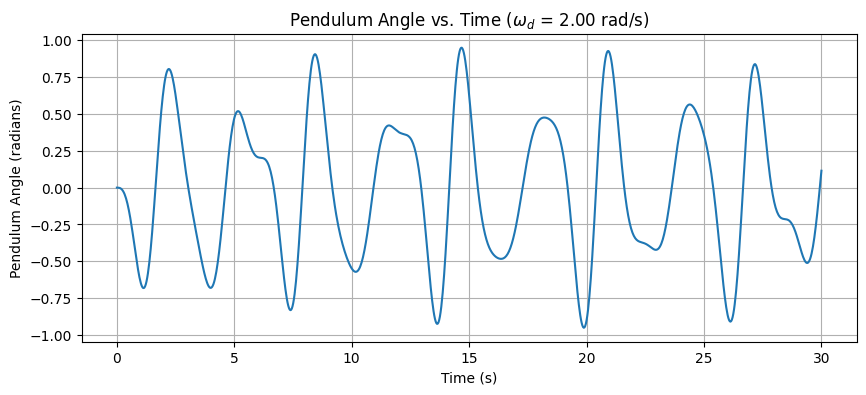

--- Generating Animation ---


In [23]:
# --- 1. Plot the pendulum angle versus time ---
print(f"--- Plotting Angle vs. Time for omega_d = {omega_d} ---")
plt.figure(figsize=(10, 4))
plt.plot(t_plot, theta_plot)
plt.xlabel('Time (s)')
plt.ylabel('Pendulum Angle (radians)')
# Add an 'r' before the string to make it a "raw" string
plt.title(rf'Pendulum Angle vs. Time ($\omega_d$ = {omega_d:.2f} rad/s)')
plt.grid(True)
plt.show()

# --- 2. Get coordinates for plotting (using the correct function calls) ---
x_pivot, y_pivot = get_pivot_xy(t_plot, l, omega_d)
x_pendulum, y_pendulum = get_pendulum_xy(theta_plot, l)
x_lab, y_lab = get_lab_xy(x_pivot, y_pivot, x_pendulum, y_pendulum)

# --- 3. Animate the motion (from README) ---
print("--- Generating Animation ---")
# animation flags/parameters
show_traj = True
speed_factor = 2 # >1 slows down animation

# create_pendulum_animation
pendulum_animation = create_pendulum_animation(
    t_plot, x_pivot, y_pivot,
    x_lab, y_lab, l=l,
    show_traj=show_traj,
    speed_factor=speed_factor
)
display(HTML(pendulum_animation.to_html5_video()))